Usage example of MediaPipe Face Detection Solution API in Python (see also http://solutions.mediapipe.dev/face_detection).

In [1]:
!pip install mediapipe

     |████████████████████████████████| 47.4MB 80kB/s 


Upload any image that contains face(s) to the Colab. We take two example images from the web: https://unsplash.com/photos/JyVcAIUAcPM and https://unsplash.com/photos/auTAb39ImXg

In [9]:
import os
import cv2
import plotly.express as px
import matplotlib.pyplot as plt
# from google.colab.patches import cv2_imshow
import mediapipe as mp

# Mediapipe su un video

In [ ]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

cap = cv2.VideoCapture('50_50_81.mp4')
img_array = []
while cap.isOpened():
  success, image = cap.read()
  if not success:
    print("Error")
    # If loading a video, use 'break' instead of 'continue'.
    break

  with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:

    # Convert the BGR image to RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = face_mesh.process(image)

  # Draw the face mesh annotations on the image.
  image.flags.writeable = True
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
  if results.multi_face_landmarks:
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACE_CONNECTIONS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)

  # Create a video with the landmark
  height, width, layers = image.shape
  size = (width,height)
  img_array.append(image)

out = cv2.VideoWriter('50_50_81.avi',cv2.VideoWriter_fourcc(*'DIVX'), 24, size)

for i in range(len(img_array)):
  out.write(img_array[i])
out.release()

cap.release()

Error


# Mediapipe su tutti video del dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
base_dir = '/gdrive/My Drive/ElderReact/ElderReact_Data/ElderReact_train/'
out_dir = 'content/output/'
videos = os.listdir(base_dir)

mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)

for video in videos:
    
  videoName = video[:-4]
  cap = cv2.VideoCapture(base_dir + video)
  img_array = []

  while cap.isOpened():

    success, image = cap.read()
    if not success:
        print("Error")
        # If loading a video, use 'break' instead of 'continue'.
        break

    with mp_face_mesh.FaceMesh(min_detection_confidence=0.5, min_tracking_confidence=0.5) as face_mesh:

        # Convert the BGR image to RGB.
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = face_mesh.process(image)

    # Draw the face mesh annotations on the image.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image.flags.writeable = True
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACE_CONNECTIONS,
                landmark_drawing_spec=drawing_spec,
                connection_drawing_spec=drawing_spec)

    # Create a video with the landmark
    height, width, layers = image.shape
    size = (width,height)
    img_array.append(image)
      
  out = cv2.VideoWriter(out_dir + videoName + '.avi', cv2.VideoWriter_fourcc(*'DIVX'), 24, size)


  for i in range(len(img_array)):
    out.write(img_array[i])
  out.release()

  cap.release()
  break

Error


# Mediapipe su immagine

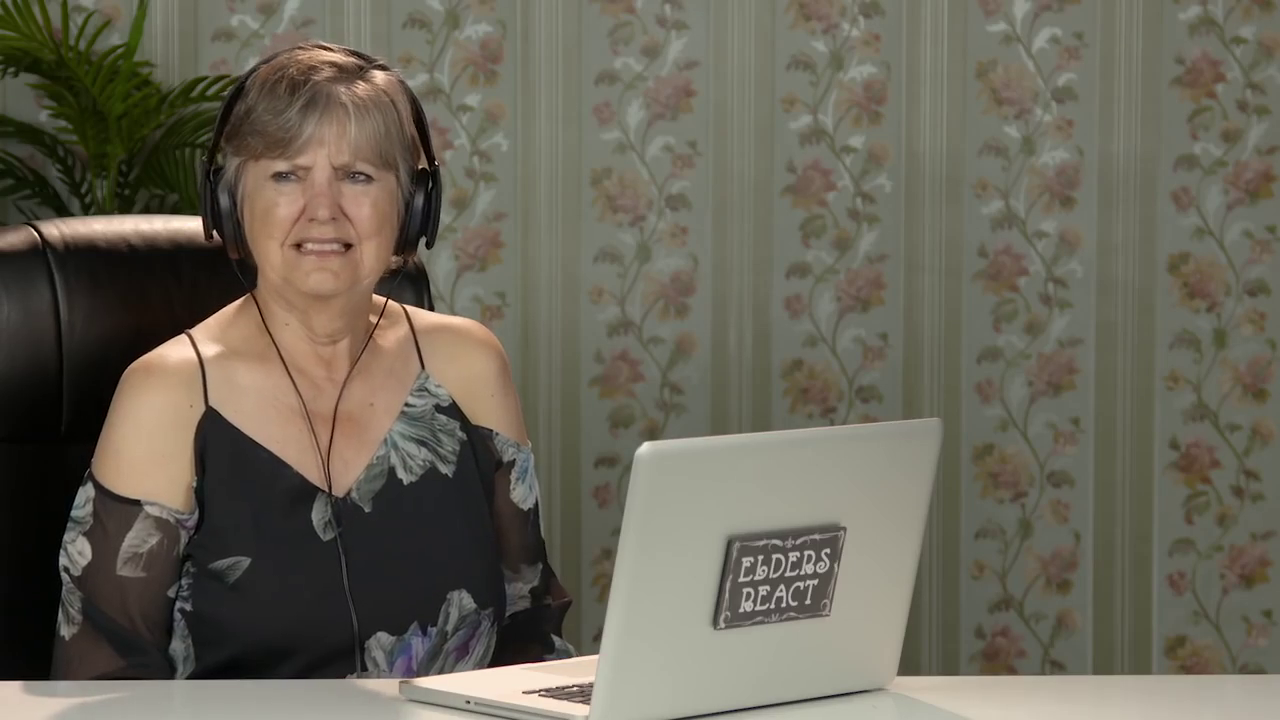

In [ ]:
# Read images with OpenCV.
cap = cv2.VideoCapture('50_50_81.mp4')

lastFrame = cap.get(cv2.CAP_PROP_FRAME_COUNT)
frameNumber = 28
if frameNumber < lastFrame:
  cap.set(cv2.CAP_PROP_POS_FRAMES, frameNumber)
  (_, frame) = cap.read()
  cv2_imshow(frame)
  cv2.imwrite('50_50_81.png', frame)
  out.release()
else:
  print('frameNumber exceeds the number of frames in the video')


All MediaPipe Solutions Python API examples are under mp.solutions.

For the MediaPipe Face Mesh solution, we can access this module as mp_face_detection = mp.solutions.face_detection.

You may change the parameter min_detection_confidence during the initialization. Run help(mp_face_detection.FaceDetection) to get more informations about the parameter.

In [ ]:
help(mp_face_mesh.FaceMesh)

Help on class FaceMesh in module mediapipe.python.solutions.face_mesh:

class FaceMesh(mediapipe.python.solution_base.SolutionBase)
 |  FaceMesh(static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |  
 |  MediaPipe FaceMesh.
 |  
 |  MediaPipe FaceMesh processes an RGB image and returns the face landmarks on
 |  each detected face.
 |  
 |  Please refer to https://solutions.mediapipe.dev/face_mesh#python-solution-api
 |  for usage examples.
 |  
 |  Method resolution order:
 |      FaceMesh
 |      mediapipe.python.solution_base.SolutionBase
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, static_image_mode=False, max_num_faces=1, min_detection_confidence=0.5, min_tracking_confidence=0.5)
 |      Initializes a MediaPipe FaceMesh object.
 |      
 |      Args:
 |        static_image_mode: Whether to treat the input images as a batch of static
 |          and possibly unrelated images, or a video stream. See 

# Estrazione landmark su 'frontal_face.png'

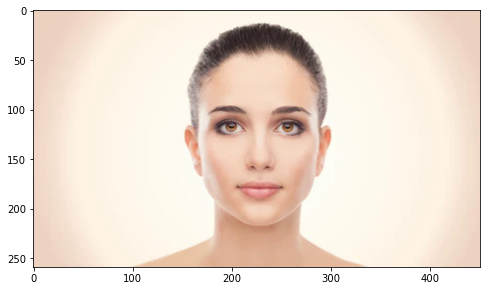

In [11]:
mp_drawing = mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

# For static images:
drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=0)
with mp_face_mesh.FaceMesh(
  static_image_mode=True,
  max_num_faces=1,
  min_detection_confidence=0.5) as face_mesh:

  image = cv2.imread('frontal_face.png')
  # Convert the BGR image to RGB before processing.
  results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

  # Print and draw face mesh landmarks on the image.
  if not results.multi_face_landmarks: print('Error')
  annotated_image = image.copy()
  for face_landmarks in results.multi_face_landmarks:
    # print('face_landmarks:', face_landmarks)
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks,
        connections=mp_face_mesh.FACE_CONNECTIONS,
        landmark_drawing_spec=drawing_spec,
        connection_drawing_spec=drawing_spec)
  annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(8,8))
  plt.imshow(annotated_image)
  plt.show()
  # cv2.imwrite('frontal_face_annotated.png', annotated_image)

In [4]:
landmarks = face_landmarks.landmark
for landmarks in results.multi_face_landmarks:
  idx=[i for i in range(468)]
  x=[landmark.x for landmark in landmarks.landmark]
  y=[landmark.y for landmark in landmarks.landmark]

x = [int(i*451) for i in x]
y = [int(i*259) for i in y]

points = [(i,x,y) for i,x,y in zip(idx,x,y)]
points

import pandas as pd

points_df = pd.DataFrame(data={'x':x, 'y':y})
# points_df.to_csv('face_mesh.csv')

Funzione per estrare un landmark date le sue coordinate

In [15]:
def extract_landmark(x, y):
  print([point for point in points if x == point[1] and y == point[2]])

extract_landmark(228,165)

[(164, 228, 165)]


In [ ]:
img = cv2.imread('frontal_face_annotated.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for point in points:
  img[point[2],point[1],0] = 255
  img[point[2],point[1],1] = 0
  img[point[2],point[1],2] = 0
  print(point)
  fig = px.imshow(img)
  fig.show()
  next = input('Next landmark...')

(0, 228, 173)
